# EDA_Optimising_NYC_Taxis

# Name:Shalin Nitin Balannavar

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [5]:
# Import warnings
import warnings
# Show a warning
warnings.warn("This feature is deprecated", DeprecationWarning)
# Suppress all warnings
warnings.filterwarnings("ignore")

In [1]:
# Import the libraries you will be using for analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.0
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [3]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [4]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
# Select the folder having data files
path = r'F:\PROJECTS\1869a29c-698e-4747-be2f-a4b9f4b0592f-Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records'

# Create a list of all the twelve files to read
files = sorted([f for f in os.listdir(path) if f.endswith('.parquet')])
print(files)

# Empty DataFrame to store sampled data
sampled_data = pd.DataFrame()

for file in files:
    print(f"Processing {file}...")
    file_path = os.path.join(path, file)
    df = pd.read_parquet(file_path)

    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract date and hour
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

    # Sample 5% per hour per date
    for date in df['pickup_date'].unique():
        day_data = df[df['pickup_date'] == date]

        for hour in range(24):
            hour_data = day_data[day_data['pickup_hour'] == hour]

            if not hour_data.empty:
                sample = hour_data.sample(frac=0.05, random_state=42)
                sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

# Optional: Drop helper columns
sampled_data.drop(columns=['pickup_date', 'pickup_hour'], inplace=True)

# Save the sampled data
sampled_data.to_parquet('sampled_combined_data.parquet', index=False)

print(" Sampling complete! File saved as 'sampled_combined_data.parquet'")


['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet']
Processing 2023-1.parquet...
Processing 2023-10.parquet...
Processing 2023-11.parquet...
Processing 2023-12.parquet...
Processing 2023-2.parquet...
Processing 2023-3.parquet...
Processing 2023-4.parquet...
Processing 2023-5.parquet...
Processing 2023-6.parquet...
Processing 2023-7.parquet...
Processing 2023-8.parquet...
Processing 2023-9.parquet...
 Sampling complete! File saved as 'sampled_combined_data.parquet'


In [ ]:
print(f"Total sampled rows: {len(sampled_data):,}")

In [ ]:
#keeping the total entries to around 250,000 to 300,000.
target_size = 275_000

sampled_data = sampled_data.sample(n=target_size, random_state=42).reset_index(drop=True)

print(f" Downsampled to {len(sampled_data):,} rows")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
# Store the df in csv/parquet

sampled_data.to_parquet('sampled_combined.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [15]:
# Load the new data file

df = pd.read_parquet('sampled_combined.parquet')

In [16]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-02 23:41:21   2023-09-02 23:54:12              1.0   
1         2  2023-12-17 02:16:52   2023-12-17 02:22:41              1.0   
2         2  2023-10-29 12:29:55   2023-10-29 12:54:10              1.0   
3         2  2023-11-30 14:17:08   2023-11-30 14:27:09              1.0   
4         2  2023-04-26 13:23:47   2023-04-26 13:34:01              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.99         1.0                  N           170            79   
1           1.72         1.0                  N           158            48   
2           1.87         1.0                  N           162           246   
3           0.61         1.0                  N           230           142   
4           1.22         1.0                  N           237           236   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         13.5    1.0      0.5        1.50           0.0   
1             1         10.0    1.0      0.5        3.00           0.0   
2             1         21.2    0.0      0.5        2.00           0.0   
3             2         10.0    0.0      0.5        0.00           0.0   
4             1         10.7    0.0      0.5        2.94           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         20.00                   2.5          NaN   
1                    1.0         18.00                   2.5          NaN   
2                    1.0         27.20                   2.5          NaN   
3                    1.0         14.00                   2.5          NaN   
4                    1.0         17.64                   2.5          NaN   

   Airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275000 entries, 0 to 274999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               275000 non-null  int64         
 1   tpep_pickup_datetime   275000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  275000 non-null  datetime64[us]
 3   passenger_count        265634 non-null  float64       
 4   trip_distance          275000 non-null  float64       
 5   RatecodeID             265634 non-null  float64       
 6   store_and_fwd_flag     265634 non-null  object        
 7   PULocationID           275000 non-null  int64         
 8   DOLocationID           275000 non-null  int64         
 9   payment_type           275000 non-null  int64         
 10  fare_amount            275000 non-null  float64       
 11  extra                  275000 non-null  float64       
 12  mta_tax                275000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [19]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.drop(columns=['store_and_fwd_flag'], inplace=True)
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [20]:
# Combine the two airport fee columns
df['Airport_fee_combined'] = df[['airport_fee', 'Airport_fee']].sum(axis=1, skipna=True)
# Drop the original two columns
df.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)
# Rename the combined column to 'airport_fee' 
df.rename(columns={'Airport_fee_combined': 'airport_fee'}, inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [24]:
# check where values of fare amount are negative
negative_fares = (df['fare_amount'] < 0).sum()
print("Negative fare count:", negative_fares)

Negative fare count: 0


Did you notice something different in the `RatecodeID` column for above records?

In [25]:
# Analyse RatecodeID for the negative fare amounts
negative_RatecodeID=(df['RatecodeID']<0).sum()
print("Negative Ratecoid count",negative_RatecodeID)

Negative Ratecoid count 0


In [26]:
# Find which columns have negative values
numeric_df = df.select_dtypes(include='number')

negative_columns = [col for col in numeric_df.columns if (numeric_df[col] < 0).any()]

print("Columns with negative values:", negative_columns)


Columns with negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [27]:
negative_counts = (numeric_df < 0).sum()

# Filter only those with at least one negative value
negative_columns = negative_counts[negative_counts > 0]

# Display full list with counts
print("Columns with negative values and their counts:\n")
print(negative_columns)

Columns with negative values and their counts:

mta_tax                  15
improvement_surcharge    16
total_amount             16
congestion_surcharge     14
airport_fee               3
dtype: int64


In [28]:
# fix these negative values
columns_to_fix = ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

# Replace negative values with absolute values
for col in columns_to_fix:
    df[col] = df[col].apply(lambda x: abs(x) if x < 0 else x)

# Confirm fix
print((df[columns_to_fix] < 0).sum())  


mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [30]:
# Find the proportion of missing values in each column
missing_proportion =100* df.isnull().mean().sort_values(ascending=False)
print(missing_proportion)


RatecodeID               3.405818
passenger_count          3.405818
congestion_surcharge     3.405818
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
mta_tax                  0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
airport_fee              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [35]:
# Display the rows with null values
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
print(df['passenger_count'].isnull().sum())

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []
0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [36]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
print(df['RatecodeID'].isnull().sum()) 

0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [37]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0], inplace=True)
print(df['congestion_surcharge'].isnull().sum())  

0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [38]:
# Handle any remaining missing values
missing_summary = df.isnull().sum()
print("Remaining missing values:\n", missing_summary[missing_summary > 0])


Remaining missing values:
 Series([], dtype: int64)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [40]:
# Describe the data and check if there are any potential outliers present

summary = df.describe(include='all')
print(summary)
# Check for potential out of place values in various columns
numeric_cols = df.select_dtypes(include='number').columns

# Detect outliers using IQR
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_rows = df[(df[col] < lower) | (df[col] > upper)]
    if not outlier_rows.empty:
        outliers[col] = len(outlier_rows)

print("Potential outliers found in the following columns:")
for col, count in outliers.items():
    print(f"{col}: {count} rows")

            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  275000.000000                      275000                      275000   
mean        1.733276  2023-07-03 00:23:32.238156  2023-07-03 00:40:57.055324   
min         1.000000         2023-01-01 00:04:55         2023-01-01 00:10:20   
25%         1.000000  2023-04-02 20:33:10.250000  2023-04-02 20:53:43.500000   
50%         2.000000  2023-06-27 17:32:36.500000  2023-06-27 17:56:23.500000   
75%         2.000000  2023-10-06 21:40:26.250000  2023-10-06 21:55:39.500000   
max         6.000000         2023-12-31 23:43:25         2024-01-01 00:15:03   
std         0.447885                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    275000.000000  275000.000000  275000.000000  275000.000000   
mean          1.356629       3.751835       1.619545     165.146680   
min           0.000000       0.000000       1.000000       1.00000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [41]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [43]:
# Continue with outlier handling
#trip_distance ≈ 0 and fare_amount > 300
near_zero_distance_high_fare = df[(df['trip_distance'] < 0.01) & (df['fare_amount'] > 300)]
print("Entries with trip_distance ~0 and fare_amount > 300:", len(near_zero_distance_high_fare))

#trip_distance == 0 and fare_amount == 0 but different pickup/dropoff zones
zero_trip_diff_zones = df[
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PULocationID'] != df['DOLocationID'])
]
print("Entries with 0 trip & fare but different zones:", len(zero_trip_diff_zones))

#trip_distance > 250 miles
long_trip_entries = df[df['trip_distance'] > 250]
print("Entries with trip_distance > 250 miles:", len(long_trip_entries))

#payment_type == 0
invalid_payment_type = df[df['payment_type'] == 0]
print("Entries with payment_type = 0:", len(invalid_payment_type))

Entries with trip_distance ~0 and fare_amount > 300: 8
Entries with 0 trip & fare but different zones: 11
Entries with trip_distance > 250 miles: 8
Entries with payment_type = 0: 9366


In [45]:
# Do any columns need standardising?
def standardize_column_names(columns):
    return [col.strip().lower().replace(" ", "_").replace("-", "_") for col in columns]

df.columns = standardize_column_names(df.columns)


<bound method DataFrame.info of         vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-09-02 23:41:21   2023-09-02 23:54:12              1.0   
1              2  2023-12-17 02:16:52   2023-12-17 02:22:41              1.0   
2              2  2023-10-29 12:29:55   2023-10-29 12:54:10              1.0   
3              2  2023-11-30 14:17:08   2023-11-30 14:27:09              1.0   
4              2  2023-04-26 13:23:47   2023-04-26 13:34:01              1.0   
...          ...                  ...                   ...              ...   
274995         2  2023-02-21 10:18:33   2023-02-21 10:24:08              1.0   
274996         2  2023-01-26 08:04:03   2023-01-26 08:13:55              2.0   
274997         1  2023-04-29 13:57:27   2023-04-29 14:01:12              1.0   
274998         1  2023-04-08 16:05:48   2023-04-08 16:29:41              1.0   
274999         1  2023-01-18 23:21:12   2023-01-18 23:23:05              2.0   

       

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [48]:
df.columns.tolist()

['vendorid',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64[us]']).columns.tolist()


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

    pickup_hour  pickup_count
0             0          8027
1             1          5207
2             2          3457
3             3          2210
4             4          1554
5             5          1621
6             6          3792
7             7          7415
8             8         10449
9             9         11623
10           10         12812
11           11         13738
12           12         15014
13           13         15432
14           14         16645
15           15         17157
16           16         17061
17           17         18659
18           18         19388
19           19         17496
20           20         15300
21           21         15376
22           22         14309
23           23         11257


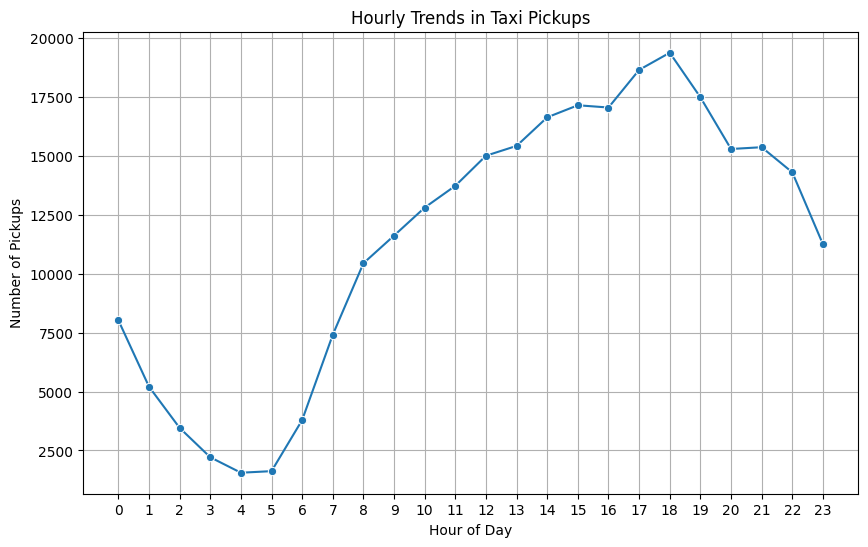

In [49]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

hourly_pickups = df.groupby('pickup_hour').size().reset_index(name='pickup_count')

print(hourly_pickups)

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_pickups, x='pickup_hour', y='pickup_count', marker='o')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

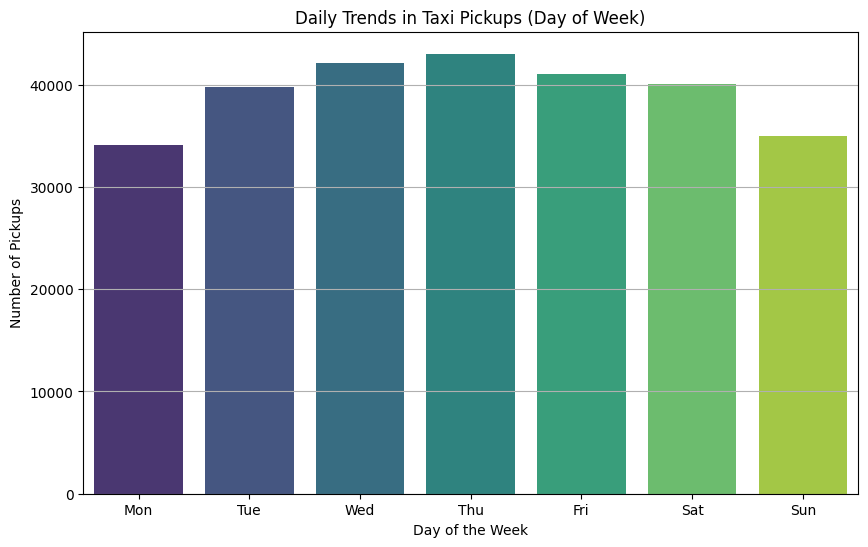

In [50]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['pickup_day_name'] = df['pickup_day'].map(day_map)

daily_pickups = df.groupby('pickup_day_name').size().reset_index(name='pickup_count')


day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_pickups['pickup_day_name'] = pd.Categorical(daily_pickups['pickup_day_name'], categories=day_order, ordered=True)
daily_pickups = daily_pickups.sort_values('pickup_day_name')

plt.figure(figsize=(10, 6))
sns.barplot(data=daily_pickups, x='pickup_day_name', y='pickup_count', palette='viridis')
plt.title('Daily Trends in Taxi Pickups (Day of Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid(True, axis='y')
plt.show()



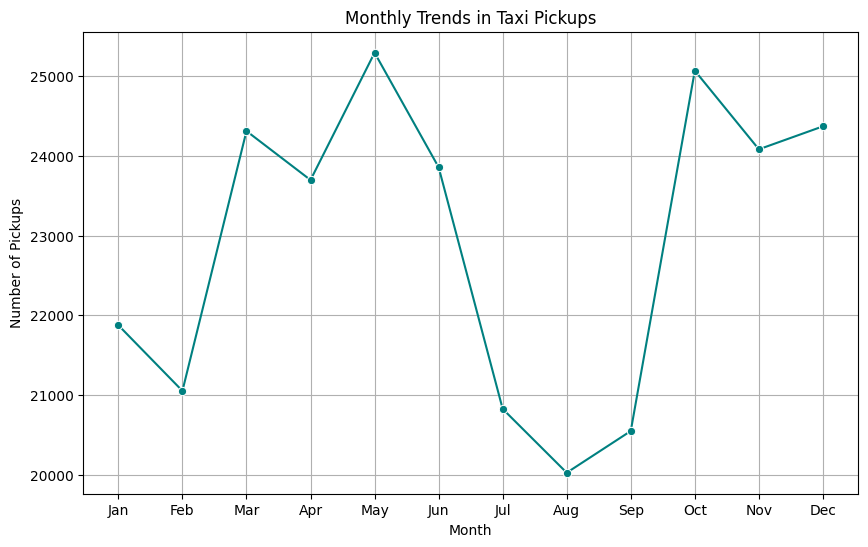

In [52]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_month_name'] = df['tpep_pickup_datetime'].dt.strftime('%b')  # 'Jan', 'Feb', etc.

# Step 2: Group and Count Pickups by Month Name
monthly_pickups = df.groupby('pickup_month_name').size().reset_index(name='pickup_count')

# Step 3: Order the months correctly
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_pickups['pickup_month_name'] = pd.Categorical(monthly_pickups['pickup_month_name'], 
                                                      categories=month_order, ordered=True)
monthly_pickups = monthly_pickups.sort_values('pickup_month_name')

# Step 4: Plot the Monthly Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_pickups, x='pickup_month_name', y='pickup_count', marker='o', color='teal')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [53]:
# Analyse the above parameters
negative_values = df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] < 0
print("Negative value counts:")
print(negative_values.sum())

# Check for zero values
zero_values = df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] == 0
print("\nZero value counts:")
print(zero_values.sum())


Negative value counts:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64

Zero value counts:
fare_amount        100
tip_amount       63428
total_amount        49
trip_distance     5369
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [54]:
# Create a df with non zero entries for the selected parameters.
selected_columns = [
    'fare_amount',
    'tip_amount',
    'total_amount',
    'trip_distance'
]

# Create a filter condition: all selected columns should be non-zero
non_zero_condition = (df[selected_columns] != 0).all(axis=1)

# Filter the original DataFrame
df_non_zero = df[non_zero_condition].copy()

# View result
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape (non-zero only):", df_non_zero.shape)


Original DataFrame shape: (274999, 23)
Filtered DataFrame shape (non-zero only): (210292, 23)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

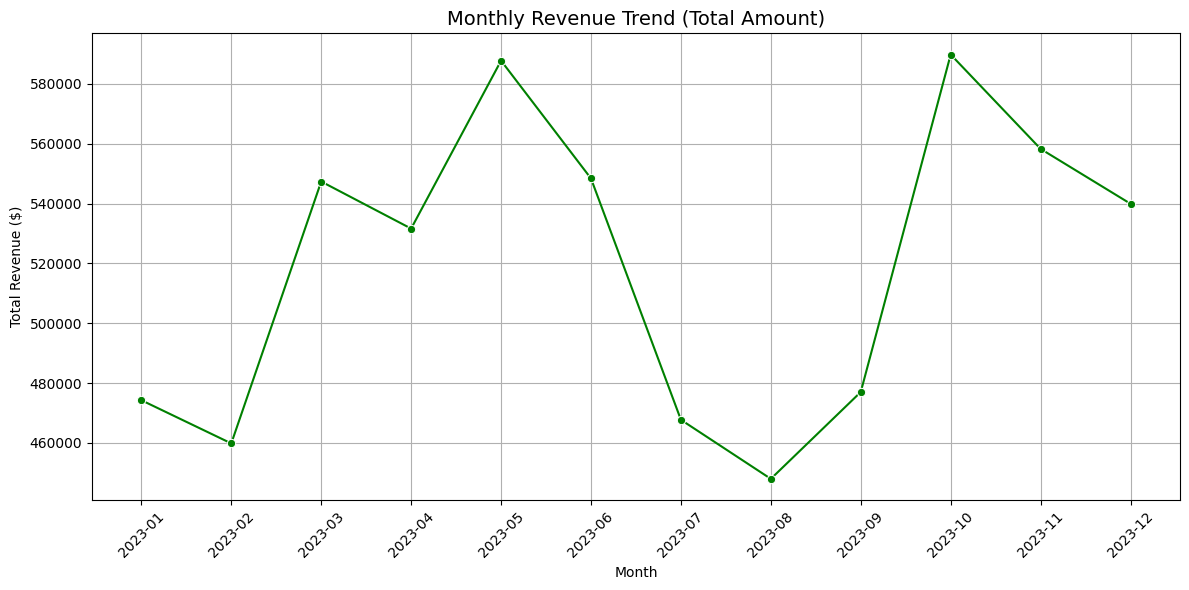

In [55]:
# Group data by month and analyse monthly revenue
df_non_zero['pickup_month'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('M')  

monthly_revenue = df_non_zero.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].astype(str) 

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='pickup_month', y='total_amount', marker='o', color='green')
plt.title('Monthly Revenue Trend (Total Amount)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  quarter  total_amount  revenue_share
0  2023Q1    1481445.64      23.779922
1  2023Q2    1667710.54      26.769815
2  2023Q3    1392730.05      22.355874
3  2023Q4    1687930.91      27.094389


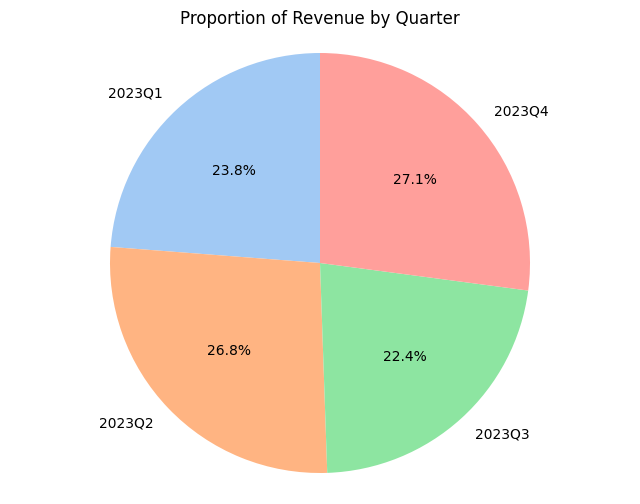

In [57]:
# Calculate proportion of each quarter
df_non_zero['quarter'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('Q')

quarterly_revenue = df_non_zero.groupby('quarter')['total_amount'].sum().reset_index()
quarterly_revenue['quarter'] = quarterly_revenue['quarter'].astype(str)

total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['revenue_share'] = (quarterly_revenue['total_amount'] / total_revenue) * 100

print(quarterly_revenue.sort_values('quarter'))

plt.figure(figsize=(8, 6))
plt.pie(quarterly_revenue['revenue_share'], labels=quarterly_revenue['quarter'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Proportion of Revenue by Quarter')
plt.axis('equal') 
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.0724


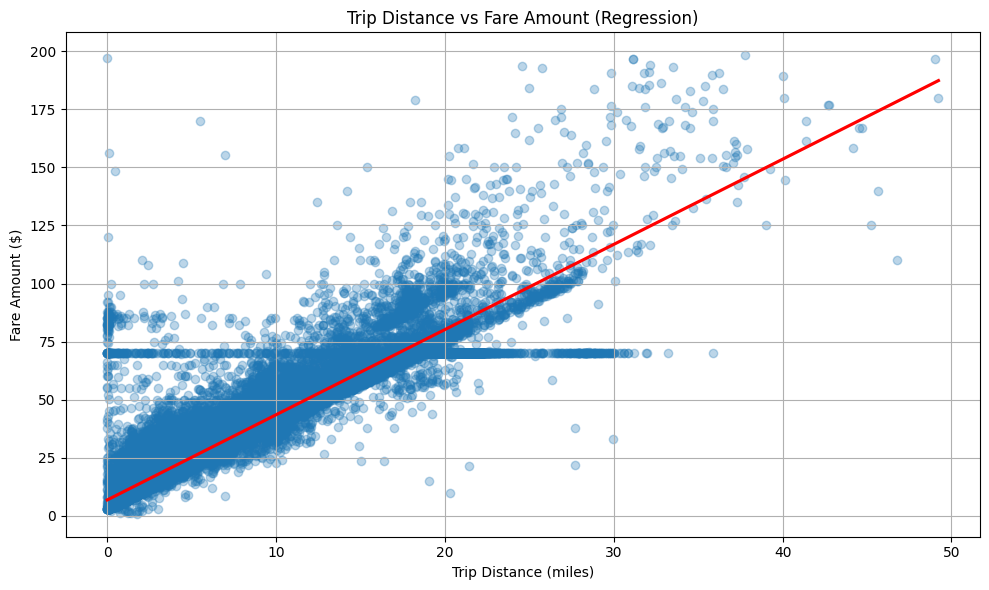

In [61]:
# Show how trip fare is affected by distance
# Filter out trips with zero trip_distance
df_trip_fare = df_non_zero[df_non_zero['trip_distance'] > 0].copy()

correlation = df_trip_fare['trip_distance'].corr(df_trip_fare['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")


df_filtered = df_trip_fare[(df_trip_fare['trip_distance'] < 50) & (df_trip_fare['fare_amount'] < 200)]

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_filtered,
    x='trip_distance',
    y='fare_amount',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.title('Trip Distance vs Fare Amount (Regression)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare_amount and trip_duration: 0.8689


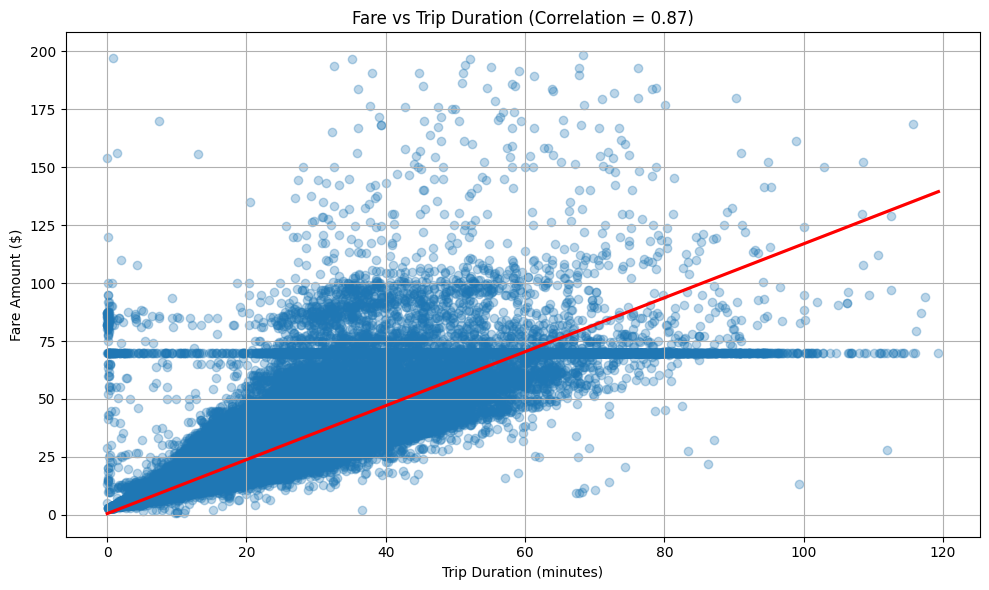

In [62]:
# Show relationship between fare and trip duration
df_non_zero['trip_duration'] = (
    df_non_zero['tpep_dropoff_datetime'] - df_non_zero['tpep_pickup_datetime']
).dt.total_seconds() / 60  # Convert to minutes

df_filtered = df_non_zero[(df_non_zero['trip_duration'] > 0) & 
                          (df_non_zero['trip_duration'] < 120) &
                          (df_non_zero['fare_amount'] < 200)]

correlation = df_filtered['fare_amount'].corr(df_filtered['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {correlation:.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_filtered,
    x='trip_duration',
    y='fare_amount',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.title(f'Fare vs Trip Duration (Correlation = {correlation:.2f})')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

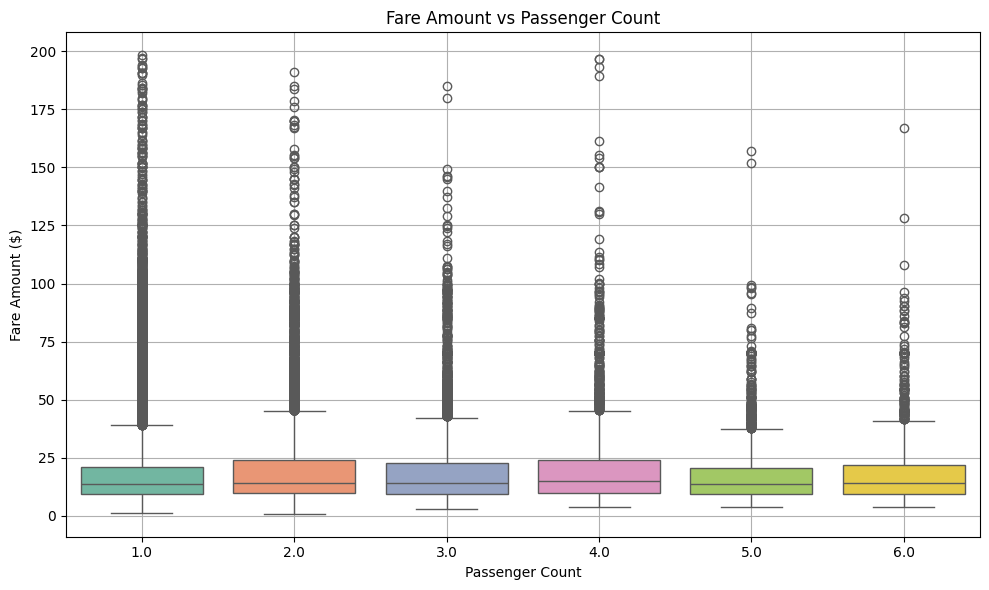

Correlation between fare_amount and passenger_count: 0.0383


In [63]:
# Show relationship between fare and number of passengers
df_fare_pass = df_non_zero[
    (df_non_zero['passenger_count'] > 0) &
    (df_non_zero['passenger_count'] <= 6) &  # usual NYC cab limit
    (df_non_zero['fare_amount'] > 0) &
    (df_non_zero['fare_amount'] < 200)  # filter extreme fares
]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_fare_pass,
    x='passenger_count',
    y='fare_amount',
    palette='Set2'
)
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

corr = df_fare_pass['fare_amount'].corr(df_fare_pass['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {corr:.4f}")

Correlation between tip_amount and trip_distance: 0.8240


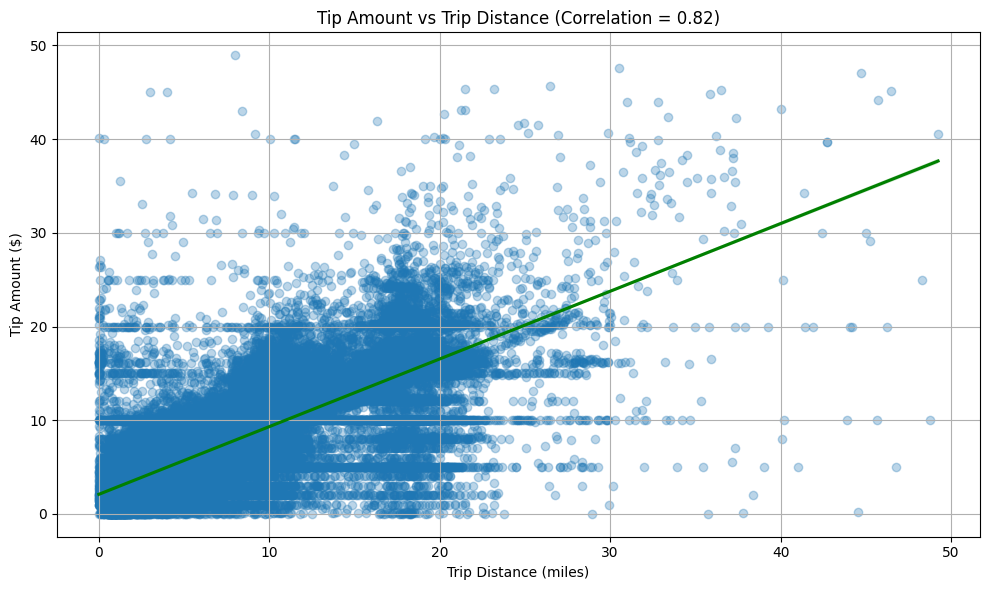

In [64]:
# Show relationship between tip and trip distance
df_tip_distance = df_non_zero[
    (df_non_zero['trip_distance'] > 0) &
    (df_non_zero['trip_distance'] < 50) &  # to avoid extreme distances
    (df_non_zero['tip_amount'] < 50)       # to avoid extreme tips
]

corr = df_tip_distance['tip_amount'].corr(df_tip_distance['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {corr:.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_tip_distance,
    x='trip_distance',
    y='tip_amount',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'green'}
)
plt.title(f'Tip Amount vs Trip Distance (Correlation = {corr:.2f})')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type_label
Credit Card    204761
Cash                2
No Charge           2
Dispute             1
Name: count, dtype: int64


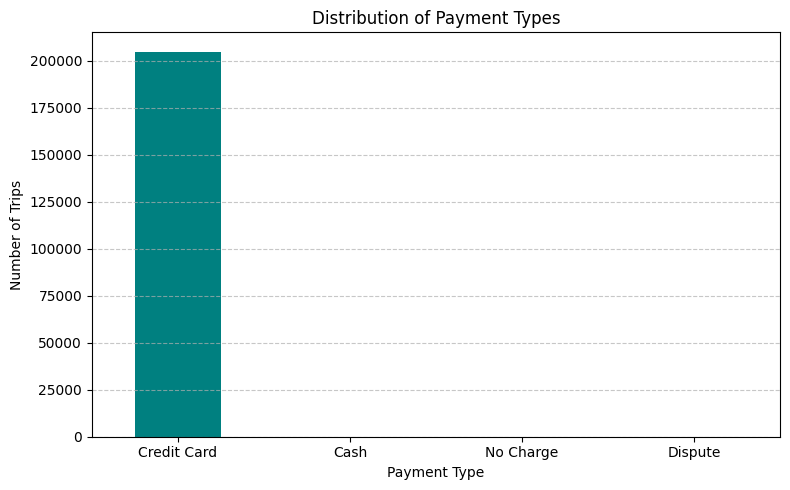

In [67]:
# Analyse the distribution of different payment types (payment_type).
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'
}

df_non_zero['payment_type_label'] = df_non_zero['payment_type'].map(payment_mapping)

payment_counts = df_non_zero['payment_type_label'].value_counts()
print(payment_counts)

plt.figure(figsize=(8, 5))
payment_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [68]:
 !pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   --- ------------------------------------ 1.8/19.2 MB 8.8 MB/s eta 0:00:02
   ------ --------------------------------- 3.1/19.2 MB 7.4 MB/s eta 0:00:03
   --------- ------------------------------ 4.5/19.2 MB 7.1 MB/s eta 0:00:03
   ------------ --------------------------- 5.8/19.2 MB 6.9 MB/s eta 0:00:02
   -------------- ------------------------- 7.1/19.2 MB 6.8 MB/s eta 0:00:02
   ------------------ --------------------- 8.7/19.2 MB 6.7 MB/s eta 0:00:02
   -------------------- ------------------- 10.0/19.2 MB 6.6 MB/s eta 0:00:02
   ----------------------- ---------------- 11.3/19.2 MB 6.6 MB/s eta 0:00:02
   -------------------------- ------------- 12.6/19.2 MB 6.6 MB/s eta 0:00:01
   ----------------------------- ---------- 13.9/19.2 MB 6.6 MB/s eta 0:00:01
   ------------------------------- -------- 15.2/19.2 MB 6.6 MB/s eta 0:00:01
   ----------------------------------- ---- 16.8/19.2 MB 6.5 MB/s eta 0:00:01



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [72]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"F:\PROJECTS\1869a29c-698e-4747-be2f-a4b9f4b0592f-Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

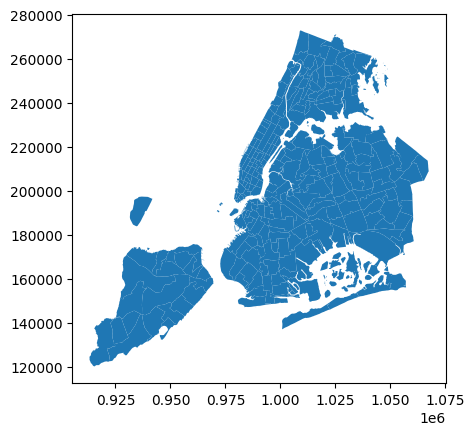

In [73]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [82]:
# Merge zones and trip records using locationID and PULocationID

# Merge zones with trip data on PULocationID to get pickup zone names
trip_with_pickup_zone = df_trip_fare.merge(
    zones[['LocationID', 'zone']],   # Selecting only necessary columns
    how='left',
    left_on='pulocationid',
    right_on='LocationID'
).rename(columns={'zone': 'pickup_zone'})  # Rename for clarity

# Drop the extra LocationID column from zones
trip_with_pickup_zone.drop(columns=['LocationID'], inplace=True)

# Display the first few rows
trip_with_pickup_zone.head()


vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-02 23:41:21   2023-09-02 23:54:12              1.0   
1         2  2023-12-17 02:16:52   2023-12-17 02:22:41              1.0   
2         2  2023-10-29 12:29:55   2023-10-29 12:54:10              1.0   
3         2  2023-04-26 13:23:47   2023-04-26 13:34:01              1.0   
4         2  2023-03-13 15:19:43   2023-03-13 15:36:49              1.0   

   trip_distance  ratecodeid  pulocationid  dolocationid  payment_type  \
0           1.99         1.0           170            79             1   
1           1.72         1.0           158            48             1   
2           1.87         1.0           162           246             1   
3           1.22         1.0           237           236             1   
4           5.05         1.0            88           170             1   

   fare_amount  ...  total_amount  congestion_surcharge  airport_fee  \
0         13.5  ...         20.00                   2.5          0.0   
1         10.0  ...         18.00                   2.5          0.0   
2         21.2  ...         27.20                   2.5          0.0   
3         10.7  ...         17.64                   2.5          0.0   
4         24.0  ...         30.00                   2.5          0.0   

   pickup_hour  pickup_day  pickup_day_name  pickup_month  pickup_month_name  \
0           23           5              Sat       2023-09                Sep   
1            2           6              Sun       2023-12                Dec   
2           12           6              Sun       2023-10                Oct   
3           13           2              Wed       2023-04                Apr   
4           15           0              Mon       2023-03                Mar   

   quarter                    pickup_zone  
0   2023Q3                    Murray Hill  
1   2023Q4  Meatpacking/West Village West  
2   2023Q4                   Midtown East  
3   2023Q2          Upper East Side South  
4   2023Q1       Financial District South  

[5 rows x 25 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [84]:
# Group data by location and calculate the number of trips
pickup_zone_trip_counts = trip_with_pickup_zone.groupby('pickup_zone').size().reset_index(name='total_trips')

# Sort the zones by total trips in descending order
pickup_zone_trip_counts = pickup_zone_trip_counts.sort_values(by='total_trips', ascending=False)

# Display the top 10 zones with most pickups
pickup_zone_trip_counts.head(10)



pickup_zone  total_trips
154         Upper East Side South        10356
102                Midtown Center         9829
153         Upper East Side North         9359
76                    JFK Airport         9214
103                  Midtown East         7820
84              LaGuardia Airport         7454
116  Penn Station/Madison Sq West         7279
88            Lincoln Square East         7224
148     Times Sq/Theatre District         6454
108                   Murray Hill         6283

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [85]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trip_counts = zones.merge(
    pickup_zone_trip_counts,
    how='left',
    left_on='zone',
    right_on='pickup_zone'
)

# 2. Fill NaN values (zones with no pickups) with 0
zones_with_trip_counts['total_trips'] = zones_with_trip_counts['total_trips'].fillna(0)

# 3. Drop the extra 'pickup_zone' column if desired
zones_with_trip_counts.drop(columns=['pickup_zone'], inplace=True)

# 4. Check the updated GeoDataFrame
zones_with_trip_counts.head()




OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   total_trips  
0          7.0  
1          0.0  
2          0.0  
3        267.0  
4          0.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

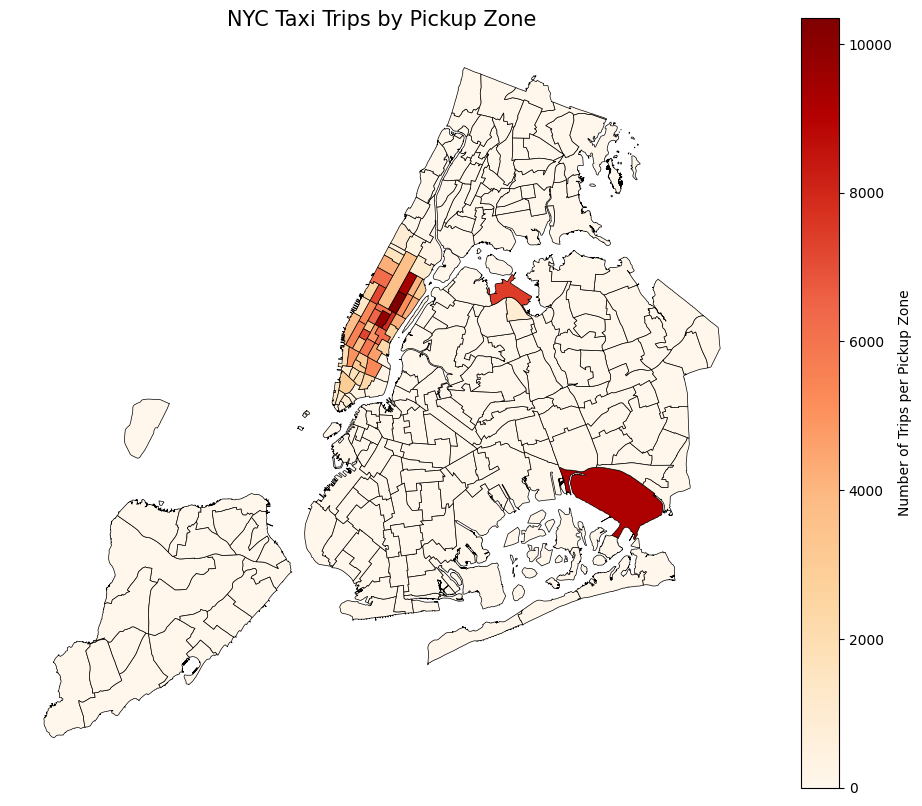

In [86]:
# Define figure and axis
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(12, 10))


zones_with_trip_counts.plot(
    column='total_trips',      
    ax=ax,
    legend=True,
    cmap='OrRd',               
    legend_kwds={
        'label': "Number of Trips per Pickup Zone",
        'orientation': "vertical"
    },
    edgecolor='black',         
    linewidth=0.5              
)


ax.set_title('NYC Taxi Trips by Pickup Zone', fontsize=15)
ax.axis('off')


plt.show()






In [87]:
# can you try displaying the zones DF sorted by the number of trips?


sorted_zones = zones_with_trip_counts.sort_values(by='total_trips', ascending=False)


sorted_zones[['LocationID', 'zone', 'borough', 'total_trips']].head(10)


LocationID                          zone    borough  total_trips
236         237         Upper East Side South  Manhattan      10356.0
160         161                Midtown Center  Manhattan       9829.0
235         236         Upper East Side North  Manhattan       9359.0
131         132                   JFK Airport     Queens       9214.0
161         162                  Midtown East  Manhattan       7820.0
137         138             LaGuardia Airport     Queens       7454.0
185         186  Penn Station/Madison Sq West  Manhattan       7279.0
141         142           Lincoln Square East  Manhattan       7224.0
229         230     Times Sq/Theatre District  Manhattan       6454.0
169         170                   Murray Hill  Manhattan       6283.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [89]:
# Find routes which have the slowest speeds at different times of the day
df_trip_fare['trip_duration_hrs'] = (
    df_trip_fare['tpep_dropoff_datetime'] - df_trip_fare['tpep_pickup_datetime']
).dt.total_seconds() / 3600

df_trip_fare = df_trip_fare[df_trip_fare['trip_duration_hrs'] > 0]

df_trip_fare['route'] = (
    df_trip_fare['pulocationid'].astype(str) + '-' + df_trip_fare['dolocationid'].astype(str)
)
df_trip_fare['pickup_hour'] = df_trip_fare['tpep_pickup_datetime'].dt.hour

avg_speed_by_route_hour = df_trip_fare.groupby(['route', 'pickup_hour']).agg({
    'trip_distance': 'mean',
    'trip_duration_hrs': 'mean'
}).reset_index()

avg_speed_by_route_hour['average_speed_mph'] = (
    avg_speed_by_route_hour['trip_distance'] / avg_speed_by_route_hour['trip_duration_hrs']
)

slowest_routes_by_hour = avg_speed_by_route_hour.sort_values(
    by=['pickup_hour', 'average_speed_mph']
).groupby('pickup_hour').head(1).reset_index(drop=True)


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 18 with 15348 trips.


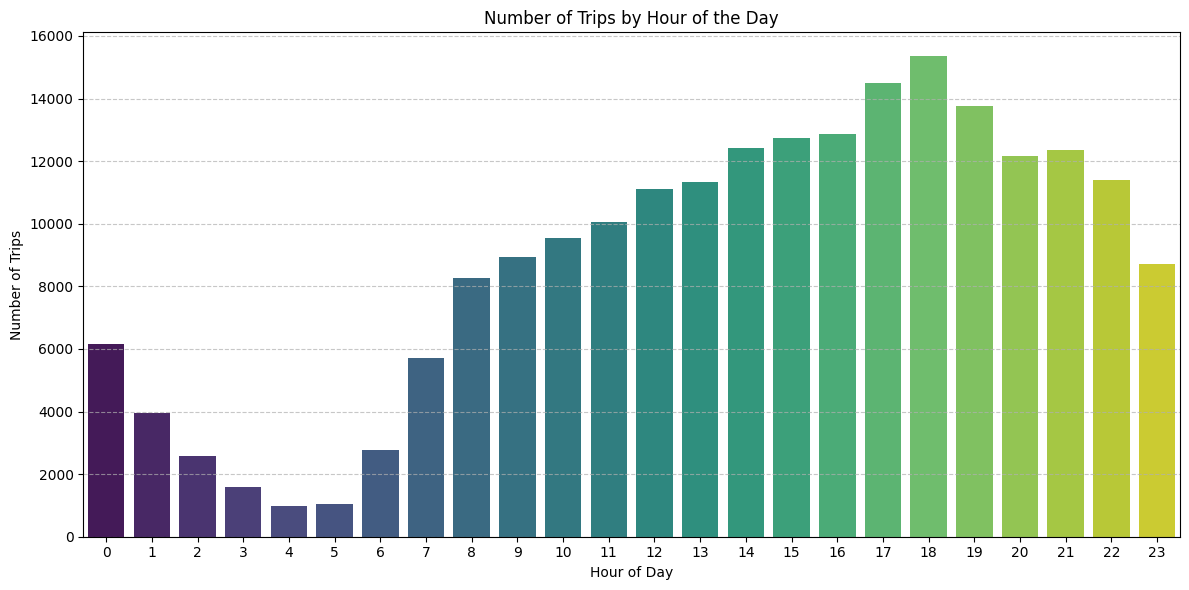

In [90]:
# Visualise the number of trips per hour and find the busiest hour
df_trip_fare['pickup_hour'] = df_trip_fare['tpep_pickup_datetime'].dt.hour

trips_per_hour = df_trip_fare.groupby('pickup_hour').size().reset_index(name='num_trips')

busiest_hour = trips_per_hour.loc[trips_per_hour['num_trips'].idxmax()]
print(f"Busiest hour: {busiest_hour['pickup_hour']} with {busiest_hour['num_trips']} trips.")

plt.figure(figsize=(12, 6))
sns.barplot(data=trips_per_hour, x='pickup_hour', y='num_trips', palette='viridis')

plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [91]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

df_trip_fare['pickup_hour'] = df_trip_fare['tpep_pickup_datetime'].dt.hour
trips_per_hour = df_trip_fare.groupby('pickup_hour').size().reset_index(name='sampled_trips')

trips_per_hour['actual_trips'] = trips_per_hour['sampled_trips'] / sample_fraction

top5_busiest_hours = trips_per_hour.sort_values(by='actual_trips', ascending=False).head(5)
print(top5_busiest_hours)




    pickup_hour  sampled_trips  actual_trips
18           18          15348      153480.0
17           17          14505      145050.0
19           19          13771      137710.0
16           16          12855      128550.0
15           15          12752      127520.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

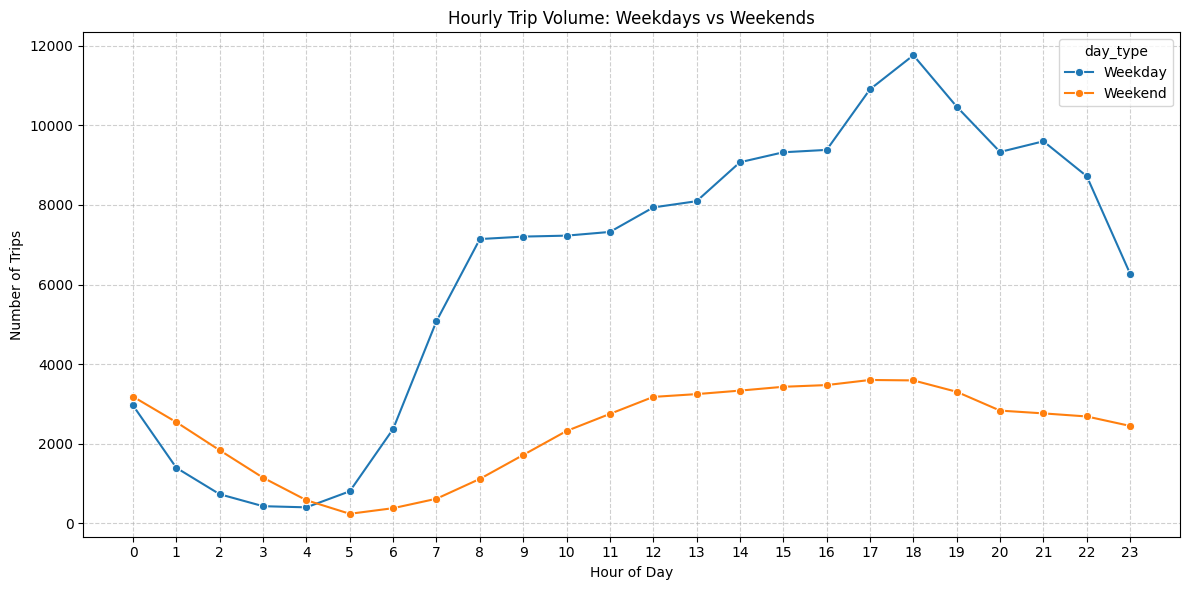

In [92]:
# Compare traffic trends for the week days and weekends
df_trip_fare['pickup_hour'] = df_trip_fare['tpep_pickup_datetime'].dt.hour
df_trip_fare['pickup_day'] = df_trip_fare['tpep_pickup_datetime'].dt.dayofweek  

df_trip_fare['day_type'] = df_trip_fare['pickup_day'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

hourly_trips_by_type = df_trip_fare.groupby(['pickup_hour', 'day_type']).size().reset_index(name='num_trips')

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trips_by_type, x='pickup_hour', y='num_trips', hue='day_type', marker='o')

plt.title('Hourly Trip Volume: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

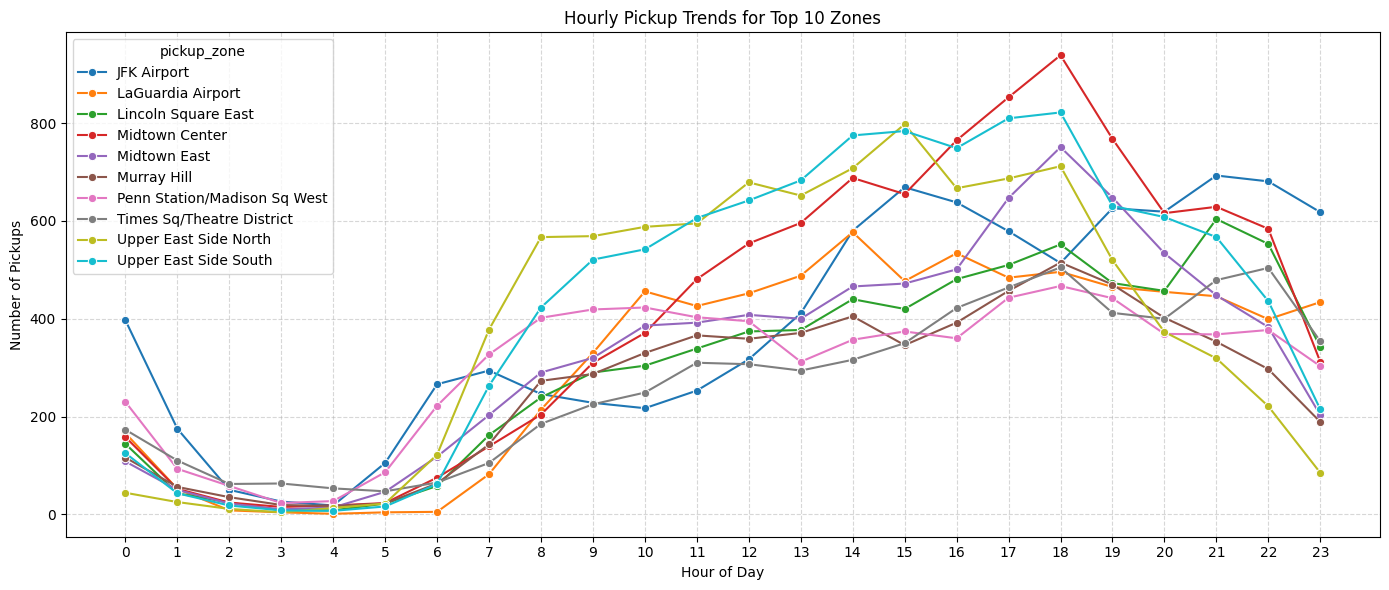

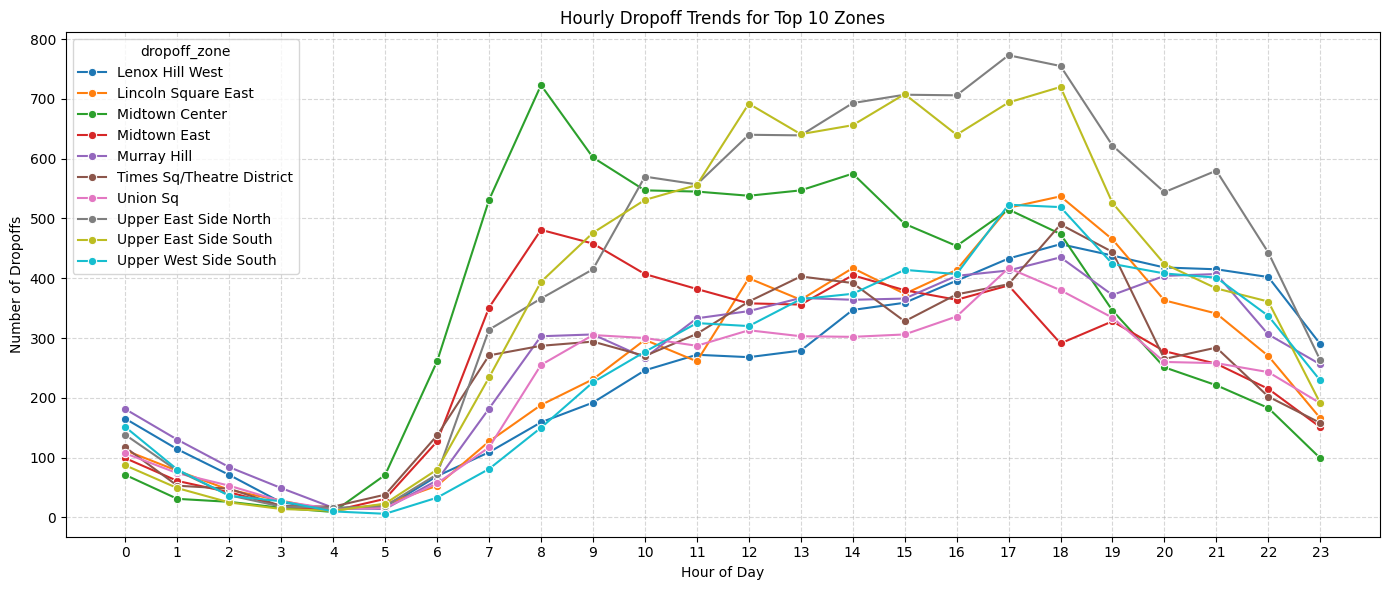

In [94]:
# Find top 10 pickup and dropoff zones

top_pickup_zones = trip_with_pickup_zone['pickup_zone'].value_counts().head(10).index.tolist()

# Similarly, create a dropoff zone column using merge
trip_with_pickup_dropoff = trip_with_pickup_zone.merge(
    zones[['LocationID', 'zone']],
    how='left',
    left_on='dolocationid',
    right_on='LocationID'
).rename(columns={'zone': 'dropoff_zone'}).drop(columns=['LocationID'])


top_dropoff_zones = trip_with_pickup_dropoff['dropoff_zone'].value_counts().head(10).index.tolist()

# Add pickup hour
trip_with_pickup_dropoff['pickup_hour'] = trip_with_pickup_dropoff['tpep_pickup_datetime'].dt.hour

# Filter for top pickup zones
top_pickup_data = trip_with_pickup_dropoff[trip_with_pickup_dropoff['pickup_zone'].isin(top_pickup_zones)]

# Filter for top dropoff zones
top_dropoff_data = trip_with_pickup_dropoff[trip_with_pickup_dropoff['dropoff_zone'].isin(top_dropoff_zones)]

# Group and count pickups
pickup_hourly = top_pickup_data.groupby(['pickup_hour', 'pickup_zone']).size().reset_index(name='pickup_count')

# Group and count dropoffs
dropoff_hourly = top_dropoff_data.groupby(['pickup_hour', 'dropoff_zone']).size().reset_index(name='dropoff_count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=pickup_hourly, x='pickup_hour', y='pickup_count', hue='pickup_zone', marker='o')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot dropoff trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_hourly, x='pickup_hour', y='dropoff_count', hue='dropoff_zone', marker='o')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [96]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count number of pickups per zone
pickup_counts = trip_with_pickup_dropoff['pickup_zone'].value_counts().reset_index()
pickup_counts.columns = ['zone', 'pickup_count']

# Count number of dropoffs per zone
dropoff_counts = trip_with_pickup_dropoff['dropoff_zone'].value_counts().reset_index()
dropoff_counts.columns = ['zone', 'dropoff_count']

# Merge on zone name
zone_ratios = pd.merge(pickup_counts, dropoff_counts, on='zone', how='outer').fillna(0)

# Calculate pickup/dropoff ratio
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / (zone_ratios['dropoff_count'] + 1e-6)

# Sort by ratio descending and ascending
top_10_ratio = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratio = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

# Display results
print(" Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\n Bottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


 Top 10 Pickup/Dropoff Ratios:
                                 zone  pickup_count  dropoff_count  \
192  Saint Michaels Cemetery/Woodside           2.0            0.0   
64                      East Elmhurst         930.0           63.0   
117                       JFK Airport        9220.0         2196.0   
126                 LaGuardia Airport        7455.0         2850.0   
173      Penn Station/Madison Sq West        7280.0         4347.0   
39                       Central Park        3602.0         2542.0   
102           Greenwich Village South        3042.0         2172.0   
234                      West Village        4977.0         3935.0   
150                      Midtown East        7820.0         6240.0   
92                   Garment District        3123.0         2550.0   

     pickup_dropoff_ratio  
192          2.000000e+06  
64           1.476190e+01  
117          4.198543e+00  
126          2.615789e+00  
173          1.674718e+00  
39           1.416994e+00  
10

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [98]:
df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid',
       'dolocationid', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_hour', 'pickup_day',
       'pickup_day_name', 'pickup_month', 'pickup_month_name'],
      dtype='object')

In [100]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23, 0, 1, 2, 3, 4, 5]

# Step 2: Filter trips in night hours
night_data = df_trip_fare[df_trip_fare['pickup_hour'].isin(night_hours)]

# Step 3: Merge pickup zone names
night_data = night_data.merge(
    zones[['LocationID', 'zone']],
    how='left',
    left_on='pulocationid',
    right_on='LocationID'
).rename(columns={'zone': 'pickup_zone'}).drop(columns=['LocationID'])

# Step 4: Merge dropoff zone names
night_data = night_data.merge(
    zones[['LocationID', 'zone']],
    how='left',
    left_on='dolocationid',
    right_on='LocationID'
).rename(columns={'zone': 'dropoff_zone'}).drop(columns=['LocationID'])

# Step 5: Count pickups and dropoffs
pickup_counts = night_data['pickup_zone'].value_counts().reset_index()
pickup_counts.columns = ['zone', 'pickup_count']

dropoff_counts = night_data['dropoff_zone'].value_counts().reset_index()
dropoff_counts.columns = ['zone', 'dropoff_count']

# Step 6: Display top 10 zones
print("Top 10 Night-Time Pickup Zones (11PM to 5AM):")
print(pickup_counts.head(10))

print("\n Top 10 Night-Time Dropoff Zones (11PM to 5AM):")
print(dropoff_counts.head(10))



Top 10 Night-Time Pickup Zones (11PM to 5AM):
                           zone  pickup_count
0                  East Village          1938
1                  West Village          1524
2                   JFK Airport          1389
3               Lower East Side          1190
4       Greenwich Village South          1140
5                  Clinton East          1136
6     Times Sq/Theatre District           862
7  Penn Station/Madison Sq West           820
8                  East Chelsea           727
9                      Gramercy           696

 Top 10 Night-Time Dropoff Zones (11PM to 5AM):
                    zone  dropoff_count
0           East Village            964
1               Gramercy            769
2           Clinton East            757
3            Murray Hill            730
4        Lenox Hill West            695
5           West Village            665
6           East Chelsea            658
7         Yorkville West            615
8  Upper East Side North            569

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [101]:
# Filter for night hours (11 PM to 5 AM)
# Step 1: Define night and day hour ranges
night_hours = [23, 0, 1, 2, 3, 4, 5]
day_hours = list(range(6, 23))  # 6 AM to 10 PM

# Step 2: Calculate revenue for night hours
night_revenue = df_trip_fare[df_trip_fare['pickup_hour'].isin(night_hours)]['fare_amount'].sum()

# Step 3: Calculate revenue for day hours
day_revenue = df_trip_fare[df_trip_fare['pickup_hour'].isin(day_hours)]['fare_amount'].sum()

# Step 4: Total revenue and shares
total_revenue = night_revenue + day_revenue
night_share = night_revenue / total_revenue * 100
day_share = day_revenue / total_revenue * 100

# Step 5: Display results
print(f" Nighttime Revenue Share (11 PM – 5 AM): {night_share:.2f}%")
print(f" Daytime Revenue Share (6 AM – 10 PM): {day_share:.2f}%")



 Nighttime Revenue Share (11 PM – 5 AM): 12.18%
 Daytime Revenue Share (6 AM – 10 PM): 87.82%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [102]:
# Analyse the fare per mile per passenger for different passenger counts
# First, filter out trips with valid distance and passenger counts
df_valid = df_trip_fare[(df_trip_fare['trip_distance'] > 0) & (df_trip_fare['passenger_count'] > 0)]

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Calculate fare per mile per passenger
df_valid['fare_per_mile_per_passenger'] = df_valid['fare_per_mile'] / df_valid['passenger_count']

# Group by passenger_count and compute the average fare per mile per passenger
pricing_strategy = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Round results for clarity
pricing_strategy['fare_per_mile_per_passenger'] = pricing_strategy['fare_per_mile_per_passenger'].round(2)

# Display the strategy
print(" Average Fare per Mile per Passenger by Passenger Count:")
print(pricing_strategy)




 Average Fare per Mile per Passenger by Passenger Count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                         9.03
1              2.0                         5.01
2              3.0                         3.56
3              4.0                         3.35
4              5.0                         1.53
5              6.0                         1.27


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [105]:
# Compare the average fare per mile for different days and for different times of the day

# Step 1: Filter valid trips (to avoid division by zero)
valid_trips = df_trip_fare[df_trip_fare['trip_distance'] > 0].copy()

#  Step 1.5: Extract pickup day name (this was missing)
valid_trips['pickup_day_name'] = valid_trips['tpep_pickup_datetime'].dt.day_name()

# Step 2: Create new column for fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Step 3: Group by pickup hour and calculate average fare per mile
avg_fare_by_hour = valid_trips.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
avg_fare_by_hour['fare_per_mile'] = avg_fare_by_hour['fare_per_mile'].round(2)

# Step 4: Group by pickup day name and calculate average fare per mile
avg_fare_by_day = valid_trips.groupby('pickup_day_name')['fare_per_mile'].mean().reset_index()
avg_fare_by_day['fare_per_mile'] = avg_fare_by_day['fare_per_mile'].round(2)

# Step 5: Sort the day names in weekday order
from pandas.api.types import CategoricalDtype

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_dtype = CategoricalDtype(categories=weekday_order, ordered=True)
avg_fare_by_day['pickup_day_name'] = avg_fare_by_day['pickup_day_name'].astype(cat_dtype)
avg_fare_by_day = avg_fare_by_day.sort_values('pickup_day_name')

# Step 6: Display the results
print(" Average Fare per Mile by Hour:")
print(avg_fare_by_hour)

print("\n Average Fare per Mile by Day of the Week:")
print(avg_fare_by_day)


🚕 Average Fare per Mile by Hour:
    pickup_hour  fare_per_mile
0             0           8.81
1             1           8.40
2             2           8.53
3             3           6.67
4             4           6.15
5             5           7.81
6             6           9.88
7             7           7.66
8             8           9.52
9             9           9.22
10           10           9.40
11           11           9.78
12           12           9.00
13           13          10.12
14           14          10.79
15           15           9.66
16           16          12.29
17           17           9.97
18           18           9.17
19           19           8.62
20           20           7.26
21           21           7.73
22           22           9.00
23           23           8.57

📅 Average Fare per Mile by Day of the Week:
  pickup_day_name  fare_per_mile
1          Monday           8.83
5         Tuesday           8.71
6       Wednesday           9.27
4        Thursd

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [108]:
# Compare fare per mile for different vendors
# Step 1: Filter valid trips (avoid division by zero or negative distances)
valid_trips = df_trip_fare[df_trip_fare['trip_distance'] > 0].copy()

# Step 2: Calculate fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Step 3: Group by VendorID and pickup_hour to calculate average fare per mile
avg_fare_vendor_hour = (
    valid_trips
    .groupby(['vendorid', 'pickup_hour'])['fare_per_mile']
    .mean()
    .reset_index()
)

# Step 4: Round the fare per mile to 2 decimal places
avg_fare_vendor_hour['fare_per_mile'] = avg_fare_vendor_hour['fare_per_mile'].round(2)

# Step 5: Display result
print(" Average Fare per Mile by Vendor and Hour of Day:")
print(avg_fare_vendor_hour)



🚕 Average Fare per Mile by Vendor and Hour of Day:
    vendorid  pickup_hour  fare_per_mile
0          1            0           7.27
1          1            1           6.52
2          1            2           7.34
3          1            3           6.35
4          1            4           7.55
5          1            5           6.01
6          1            6           6.30
7          1            7           6.96
8          1            8           7.77
9          1            9           8.04
10         1           10           8.40
11         1           11           8.49
12         1           12           8.68
13         1           13           8.42
14         1           14           8.72
15         1           15           8.54
16         1           16           8.38
17         1           17           8.45
18         1           18           8.24
19         1           19           7.60
20         1           20           7.22
21         1           21           6.98
22    

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [109]:
# Defining distance tiers
# Step 1: Filter valid trips (avoid division by zero or negative distance)
valid_trips = df_trip_fare[df_trip_fare['trip_distance'] > 0].copy()

# Step 2: Calculate fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Step 3: Define distance tiers
def assign_distance_tier(distance):
    if distance <= 2:
        return '0–2 miles'
    elif distance <= 5:
        return '2–5 miles'
    else:
        return '>5 miles'

valid_trips['distance_tier'] = valid_trips['trip_distance'].apply(assign_distance_tier)

# Step 4: Group by vendorid and distance tier
avg_fare_by_tier = (
    valid_trips.groupby(['vendorid', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
)

# Step 5: Round fare_per_mile for readability
avg_fare_by_tier['fare_per_mile'] = avg_fare_by_tier['fare_per_mile'].round(2)

# Step 6: Sort tiers logically
tier_order = ['0–2 miles', '2–5 miles', '>5 miles']
avg_fare_by_tier['distance_tier'] = pd.Categorical(avg_fare_by_tier['distance_tier'], categories=tier_order, ordered=True)
avg_fare_by_tier = avg_fare_by_tier.sort_values(['vendorid', 'distance_tier'])

# Step 7: Display
print("🚖 Average Fare per Mile by Vendor and Distance Tier:")
print(avg_fare_by_tier)



🚖 Average Fare per Mile by Vendor and Distance Tier:
   vendorid distance_tier  fare_per_mile
0         1     0–2 miles           9.44
1         1     2–5 miles           6.36
2         1      >5 miles           4.47
3         2     0–2 miles          13.22
4         2     2–5 miles           6.54
5         2      >5 miles           4.49


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [110]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_trip_fare = df_trip_fare[df_trip_fare['fare_amount'] > 0].copy()
df_trip_fare['tip_percentage'] = (df_trip_fare['tip_amount'] / df_trip_fare['fare_amount']) * 100

# Categorize trip distances
def distance_category(dist):
    if dist <= 2:
        return '0–2 miles'
    elif dist <= 5:
        return '2–5 miles'
    elif dist <= 10:
        return '5–10 miles'
    else:
        return '>10 miles'

df_trip_fare['distance_tier'] = df_trip_fare['trip_distance'].apply(distance_category)

avg_tip_by_distance = (
    df_trip_fare.groupby('distance_tier')['tip_percentage']
    .mean()
    .reset_index()
    .sort_values('distance_tier')
)

print("💵 Average Tip % by Distance Tier:")
print(avg_tip_by_distance)

avg_tip_by_passenger = (
    df_trip_fare.groupby('passenger_count')['tip_percentage']
    .mean()
    .reset_index()
    .sort_values('passenger_count')
)

print("\n👥 Average Tip % by Passenger Count:")
print(avg_tip_by_passenger)


avg_tip_by_hour = (
    df_trip_fare.groupby('pickup_hour')['tip_percentage']
    .mean()
    .reset_index()
    .sort_values('pickup_hour')
)

print("\n⏰ Average Tip % by Pickup Hour:")
print(avg_tip_by_hour)



💵 Average Tip % by Distance Tier:
  distance_tier  tip_percentage
0     0–2 miles       28.808654
1     2–5 miles       23.135374
2    5–10 miles       22.368510
3     >10 miles       21.487338

👥 Average Tip % by Passenger Count:
   passenger_count  tip_percentage
0              0.0       26.349094
1              1.0       26.071810
2              2.0       25.844318
3              3.0       25.922522
4              4.0       25.934649
5              5.0       26.017308
6              6.0       26.135461

⏰ Average Tip % by Pickup Hour:
    pickup_hour  tip_percentage
0             0       25.508438
1             1       26.058442
2             2       26.810764
3             3       27.170573
4             4       26.526001
5             5       25.181556
6             6       25.139535
7             7       24.931900
8             8       24.889608
9             9       25.278412
10           10       25.376852
11           11       25.517885
12           12       25.337650
13      

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_df = df_trip_fare[df_trip_fare['tip_percentage'] < 10]
high_tip_df = df_trip_fare[df_trip_fare['tip_percentage'] > 25]

print("📏 Avg Trip Distance:")
print("Low Tip:", round(low_tip_df['trip_distance'].mean(), 2), "miles")
print("High Tip:", round(high_tip_df['trip_distance'].mean(), 2), "miles")

print("\n👥 Passenger Count Distribution (Low Tip):")
print(low_tip_df['passenger_count'].value_counts(normalize=True).sort_index())

print("\n👥 Passenger Count Distribution (High Tip):")
print(high_tip_df['passenger_count'].value_counts(normalize=True).sort_index())

low_tip_hourly = low_tip_df['pickup_hour'].value_counts(normalize=True).sort_index()
high_tip_hourly = high_tip_df['pickup_hour'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(10, 5))
plt.plot(low_tip_hourly.index, low_tip_hourly.values, label='Low Tip (<10%)', marker='o')
plt.plot(high_tip_hourly.index, high_tip_hourly.values, label='High Tip (>25%)', marker='o')
plt.title("Pickup Hour Distribution: Low vs High Tips")
plt.xlabel("Hour of Day")
plt.ylabel("Proportion of Trips")
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

print("\n Payment Type (Low Tip):")
print(low_tip_df['payment_type'].value_counts(normalize=True))

print("\n Payment Type (High Tip):")
print(high_tip_df['payment_type'].value_counts(normalize=True))

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

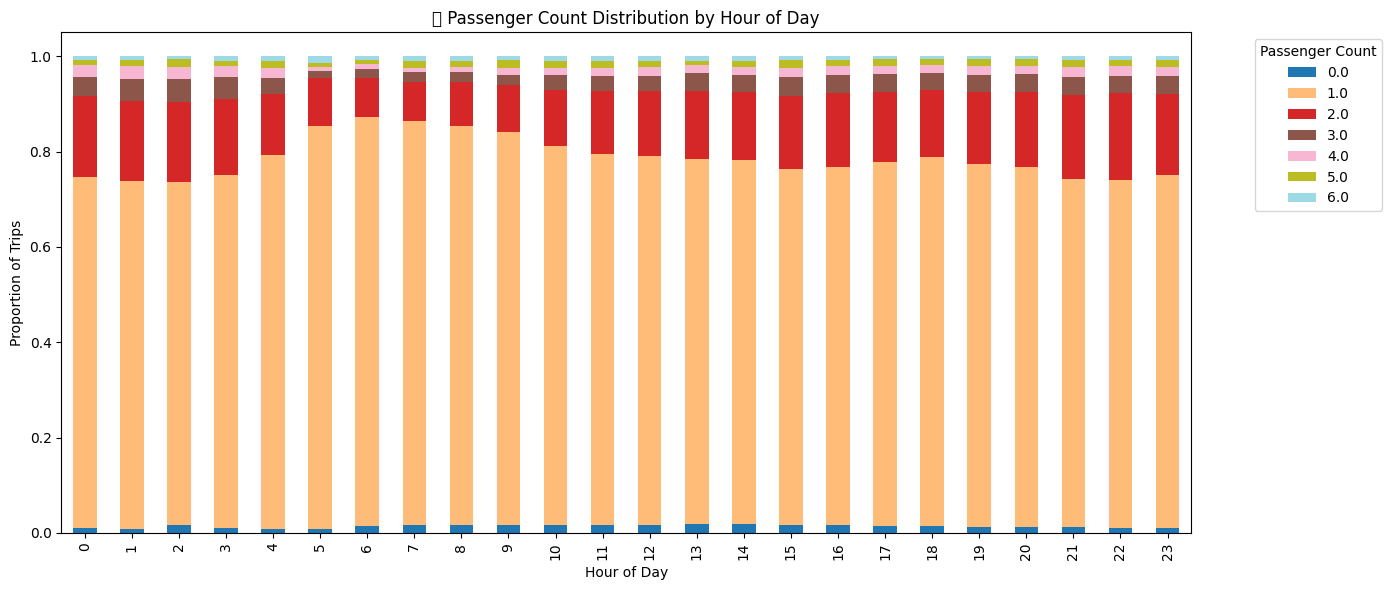

In [116]:
# See how passenger count varies across hours and days

# Group by pickup hour and passenger count
passenger_by_hour = df_trip_fare.groupby(['pickup_hour', 'passenger_count']).size().reset_index(name='trip_count')

# Pivot for better visualization
passenger_hour_pivot = passenger_by_hour.pivot(index='pickup_hour', columns='passenger_count', values='trip_count').fillna(0)

# Normalize by row (hour) to show proportions
passenger_hour_pivot_norm = passenger_hour_pivot.div(passenger_hour_pivot.sum(axis=1), axis=0)

# Plot
import matplotlib.pyplot as plt

passenger_hour_pivot_norm.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('📊 Passenger Count Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Trips')
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()






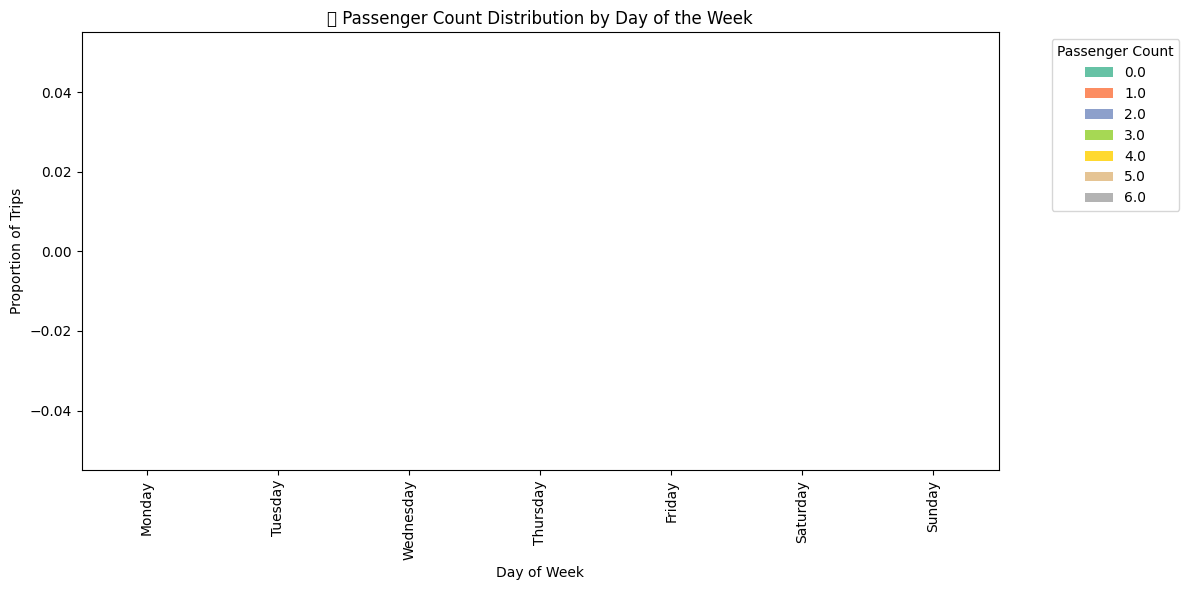

In [117]:
# Group by pickup day and passenger count
passenger_by_day = df_trip_fare.groupby(['pickup_day_name', 'passenger_count']).size().reset_index(name='trip_count')

# Sort days of week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_by_day['pickup_day_name'] = pd.Categorical(passenger_by_day['pickup_day_name'], categories=weekday_order, ordered=True)
passenger_by_day = passenger_by_day.sort_values('pickup_day_name')

# ✅ Use pivot_table instead of pivot to avoid error
passenger_day_pivot = passenger_by_day.pivot_table(
    index='pickup_day_name',
    columns='passenger_count',
    values='trip_count',
    aggfunc='sum',
    fill_value=0
)

# Normalize to see proportion of passenger counts
passenger_day_pivot_norm = passenger_day_pivot.div(passenger_day_pivot.sum(axis=1), axis=0)

# Plot
import matplotlib.pyplot as plt

passenger_day_pivot_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Set2'
)
plt.title('📅 Passenger Count Distribution by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Trips')
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

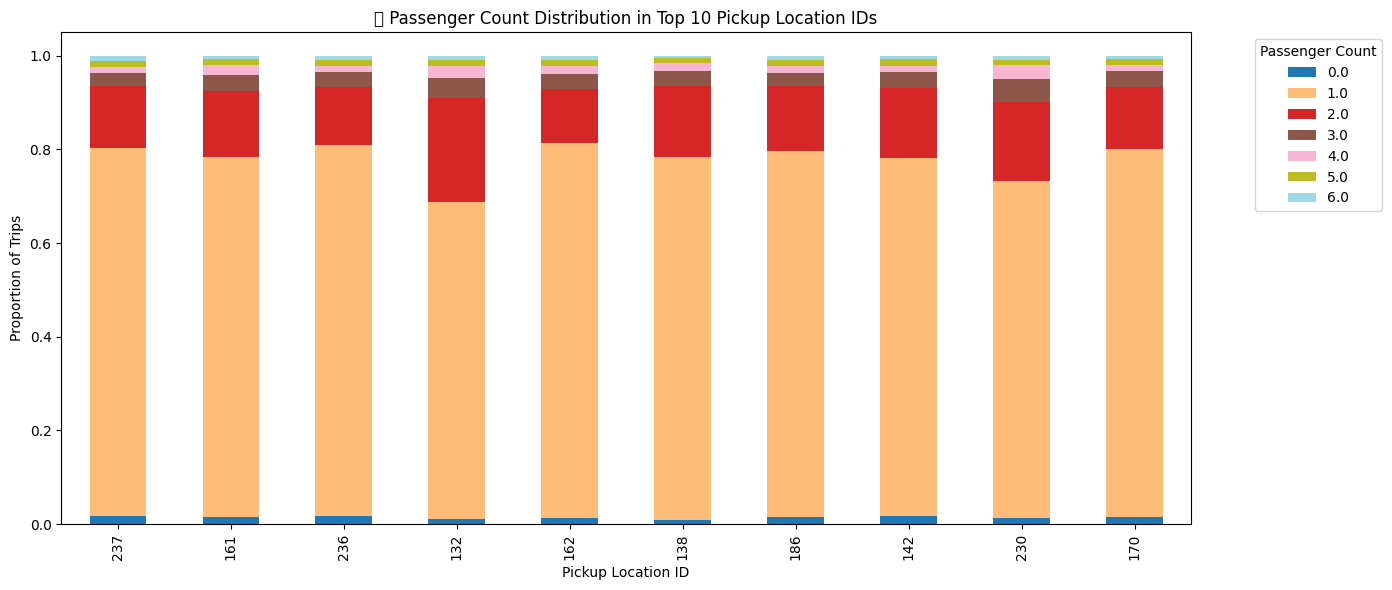

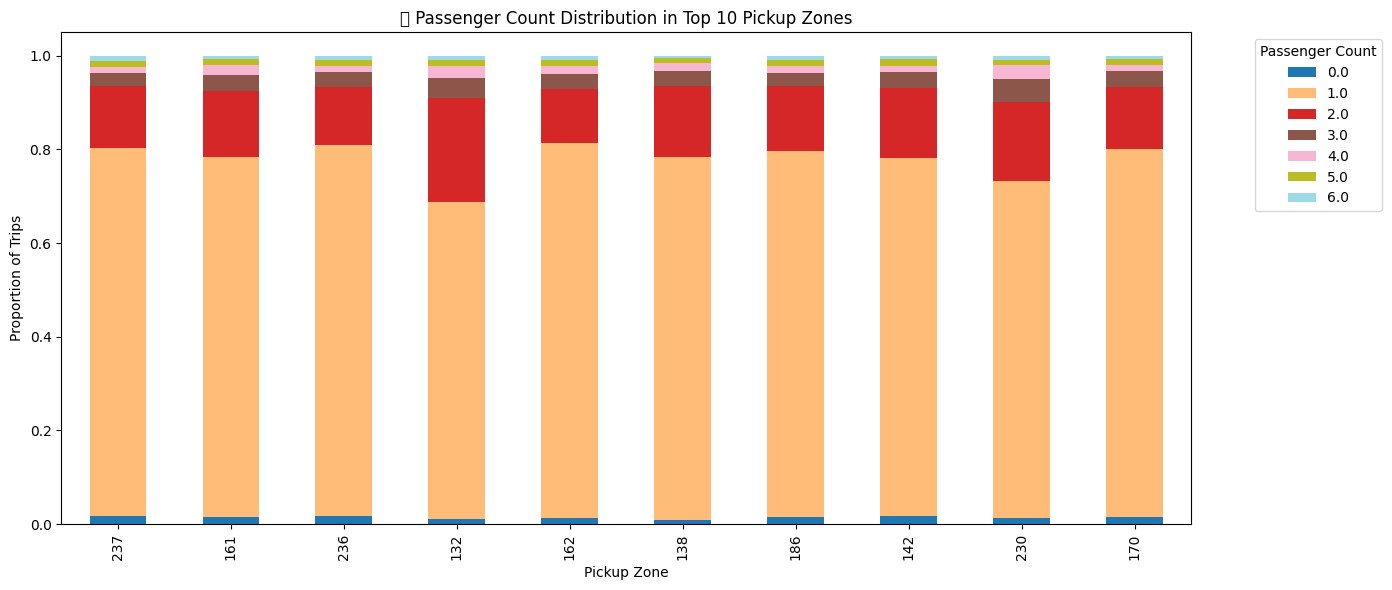

In [120]:
# How does passenger count vary across zones
zone_passenger_counts = df_trip_fare.groupby(['pulocationid', 'passenger_count']).size().reset_index(name='trip_count')

zone_pivot = zone_passenger_counts.pivot_table(
    index='pulocationid',
    columns='passenger_count',
    values='trip_count',
    aggfunc='sum',
    fill_value=0
)

zone_pivot_norm = zone_pivot.div(zone_pivot.sum(axis=1), axis=0)

top_zones = zone_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
zone_pivot_top = zone_pivot_norm.loc[top_zones]

zone_pivot_top.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='tab20'
)
plt.title('🗺️ Passenger Count Distribution in Top 10 Pickup Location IDs')
plt.xlabel('Pickup Location ID')
plt.ylabel('Proportion of Trips')
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Normalize to get proportions of passenger counts per zone
zone_pivot_norm = zone_pivot.div(zone_pivot.sum(axis=1), axis=0)

import matplotlib.pyplot as plt

# Get top 10 zones by total trip volume
top_zones = zone_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
zone_pivot_top = zone_pivot_norm.loc[top_zones]

zone_pivot_top.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='tab20'
)
plt.title('🗺️ Passenger Count Distribution in Top 10 Pickup Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Proportion of Trips')
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



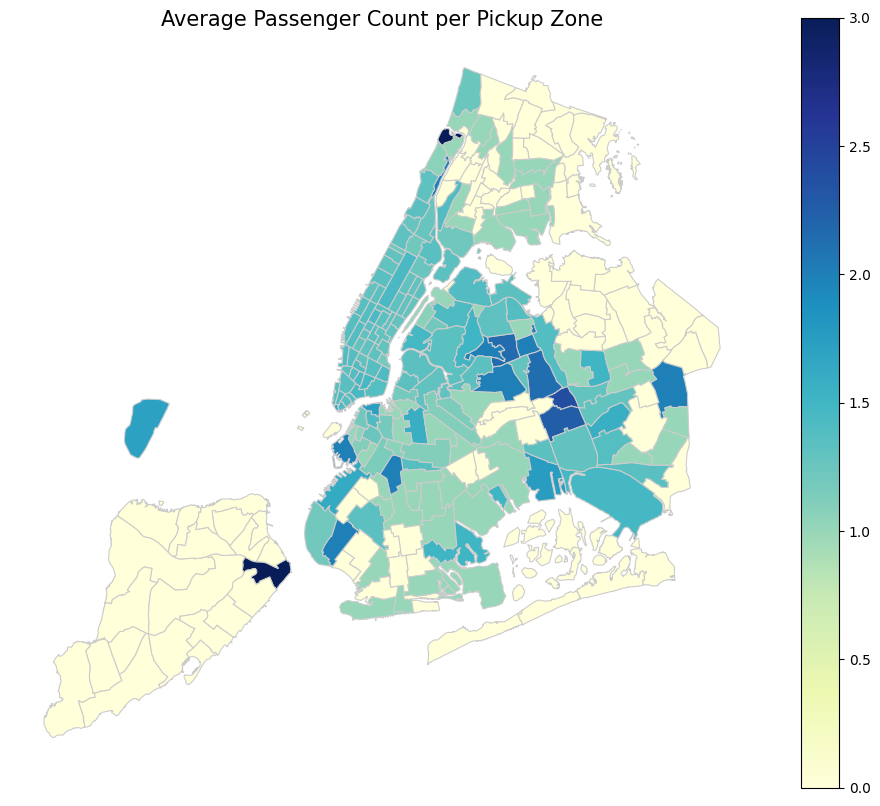

In [123]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Step 1: Calculate average passenger count per pickup location
avg_passenger_count = df_trip_fare.groupby('pulocationid')['passenger_count'].mean().reset_index()
avg_passenger_count.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Step 2: Merge with the taxi zones shapefile GeoDataFrame
zones_with_trips = zones.merge(avg_passenger_count, left_on='LocationID', right_on='pulocationid', how='left')

# Step 3: Fill missing values (for zones with no trips)
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)

# Step 4 (Optional): Visualize the variation across zones
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))
zones_with_trips.plot(
    column='avg_passenger_count',
    cmap='YlGnBu',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)

ax.set_title('Average Passenger Count per Pickup Zone', fontsize=15)
ax.axis('off')
plt.show()





Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [126]:
# How often is each surcharge applied?
zone_lookup = zones[['LocationID', 'zone']].copy()
zone_lookup.rename(columns={'zone': 'Zone'}, inplace=True)  # Make sure the column matches expected name

# Merge pickup zone names into trip fare data
df_with_zones = df_trip_fare.merge(zone_lookup, left_on='pulocationid', right_on='LocationID', how='left')

# Group by pickup zone and extra charge
zone_extra = df_with_zones.groupby(['Zone', 'extra']).size().reset_index(name='count')

# Pivot to see per-zone surcharge distribution
zone_extra_pivot = zone_extra.pivot(index='Zone', columns='extra', values='count').fillna(0)
zone_extra_pivot['Total'] = zone_extra_pivot.sum(axis=1)

# Percentage-wise distribution
zone_extra_percent = zone_extra_pivot.div(zone_extra_pivot['Total'], axis=0) * 100
zone_extra_percent.drop(columns='Total', inplace=True)

zone_extra_percent.head()


extra                        0.00   0.03   0.19   0.50   0.75        1.00   \
Zone                                                                         
Alphabet City            25.842697    0.0    0.0    0.0    0.0   51.310861   
Arrochar/Fort Wadsworth   0.000000    0.0    0.0    0.0    0.0  100.000000   
Astoria                  52.727273    0.0    0.0    0.0    0.0   32.727273   
Baisley Park             56.756757    0.0    0.0    0.0    0.0    5.405405   
Battery Park             68.333333    0.0    0.0    0.0    0.0    1.666667   

extra                    1.25   1.75   2.25       2.50   ...     7.50   7.75   \
Zone                                                     ...                    
Alphabet City              0.0    0.0    0.0   7.490637  ...  0.000000    0.0   
Arrochar/Fort Wadsworth    0.0    0.0    0.0   0.000000  ...  0.000000    0.0   
Astoria                    0.0    0.0    0.0   9.090909  ...  1.818182    0.0   
Baisley Park               0.0    0.0    0.0  16.216216  ...  2.702703    0.0   
Battery Park               0.0    0.0    0.0  20.000000  ...  0.000000    0.0   

extra                    8.50   8.75   9.25   9.75   10.00  10.25  11.25  \
Zone                                                                       
Alphabet City              0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Arrochar/Fort Wadsworth    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Astoria                    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Baisley Park               0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Battery Park               0.0    0.0    0.0    0.0    0.0    0.0    0.0   

extra                    11.75  
Zone                            
Alphabet City              0.0  
Arrochar/Fort Wadsworth    0.0  
Astoria                    0.0  
Baisley Park               0.0  
Battery Park               0.0  

[5 rows x 35 columns]

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Focus dispatching resources heavily during peak hours, especially 4 PM to 7 PM, when demand is highest.

Use weekday vs. weekend patterns to adjust driver schedules — deploy more taxis during weekday rush hours and scale down overnight or early morning shifts.

Avoid routing cabs into zones with high dropoff but low pickup ratios, such as residential or park areas, to reduce empty return trips.

Prioritize routing efficiency on slow routes with low average speeds, particularly those identified in afternoon congestion.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Position cabs in high-volume pickup zones like Midtown Center, Upper East Side, East Village, and JFK Airport during peak hours.

Allocate resources to nightlife hubs (e.g., West Village, Lower East Side, Times Sq) between 11 PM and 2 AM, where late-night pickups are frequent.

Adjust deployment by hourly and daily pickup patterns: For example, deploy more cabs in office zones on weekdays and entertainment zones on weekends.

Use zone-level trip volume maps and pickup/dropoff heatmaps to plan hub locations for idle cab standby and real-time reallocation.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

For short-distance trips (0–2 miles), consider reviewing pricing models, as Vendor 2 charges a premium compared to Vendor 1 — suggesting pricing elasticity.

Introduce dynamic pricing during high-demand windows (4–7 PM) and on Sundays, when fare per mile is highest.

Offer group discounts or multi-passenger incentives, as cost per mile per passenger drops sharply with higher occupancy.

Adjust fare per mile gradually across tiers to remain competitive with similar vendor pricing for 2–5 mile and >5 mile ranges.